# EC412 Assignment 1: Machine Learning Based Offline Signature Verification system

## Name: Vishesh Kishore  Roll No.: 2K17/MC/123

### Model an independent signature verification task with a machine learning algorithm. In order to evaluate your signature verification algorithm, you should consider five widely used benchmark databases, viz., CEDAR, GPDS, MCYT-75, UTSig, and BHSig260 and also measure accuracy, precision, recall, and F-score. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import keras
import glob

Using TensorFlow backend.


### Loading dataset
https://www.kaggle.com/robinreni/signature-verification-dataset

In [1]:
train = "/kaggle/input/signature-verification-dataset/sign_data/train/"
test = "/kaggle/input/signature-verification-dataset/sign_data/test/"

In [7]:
size = 100

### Image of a Genuine Signature

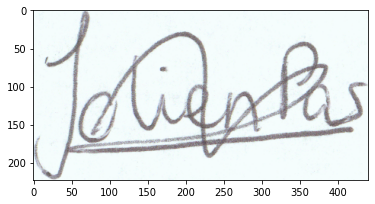

In [22]:
orig_img = plt.imread('/Users/visheshkishore/Desktop/Semester 8/EC412 Machine Learning/sign_data/train/006/006_03.PNG')
plt.imshow(orig_img)

### Image of a Forged Signature

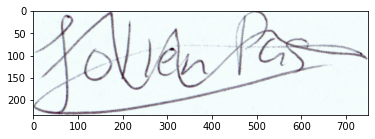

In [23]:
frg_img = plt.imread('/Users/visheshkishore/Desktop/Semester 8/EC412 Machine Learning/sign_data/train/006_forg/0111006_03.PNG')
plt.imshow(frg_img)

In [10]:
import os

#Working with Training Data

train_data = []
train_labels = []

for per in os.listdir('/Users/visheshkishore/Desktop/Semester 8/EC412 Machine Learning/sign_data/train/'):
    for data in glob.glob('/Users/visheshkishore/Desktop/Semester 8/EC412 Machine Learning/sign_data/train'+per+'/*.*'):
        img = cv2.imread(data,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (size, size))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

In [11]:
#Working with Testing Data

test_data = []
test_labels = []

for per in os.listdir('/Users/visheshkishore/Desktop/Semester 8/EC412 Machine Learning/sign_data/test/'):
    for data in glob.glob('/Users/visheshkishore/Desktop/Semester 8/EC412 Machine Learning/sign_data/test'+per+'/*.*'):
        img = cv2.imread(data,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (size, size))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(1)
        else:
            test_labels.append(0)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [12]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels, dtype="float32")

In [13]:
train_data.shape

(1649, 1, 100, 100)

In [14]:
#Based upon training data available and the size specified

train_data = train_data.reshape(-1, size,size, 1)
train_data.shape

(1649, 100, 100, 1)

In [15]:
#Based upon testinging data available and the size specified

test_data = test_data.reshape(-1, size,size, 1)
test_data.shape

(500, 100, 100, 1)

In [16]:
from sklearn.utils import shuffle

#Organizes and shuffles the data

train_data,train_labels = shuffle(train_data,train_labels)
test_data,test_labels = shuffle(test_data,test_labels)

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam

In [18]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard

In [25]:
#Understanding parameters via CNN layers

grid = Sequential()

#1st Convolution
grid.add(Conv2D(64,(3,3),activation='relu',input_shape=(size,size,1))) #64 3X3 Filters: Input image is of 100X100X1
grid.add(MaxPooling2D(3,3))  

#2nd Covolution
grid.add(Conv2D(32,(3,3),activation='relu')) #32 3X3 Filters
grid.add(MaxPooling2D(2,2))
grid.add(Flatten())
grid.add(Dense(128,activation = 'relu'))
grid.add(Dropout(rate=0.3))
grid.add(Dense(2,activation = 'softmax'))

grid.compile(optimizer=keras.optimizers.Adam(),loss="categorical_crossentropy",metrics=["accuracy"])

grid.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 30, 30, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               921728    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [26]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard

In [54]:
#Early Stopping based upon Value Improvisations

no_improv = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=4, verbose=1)

x = [no_improv]

count = 25
size_batch = 64
progress = grid.fit(train_data,train_labels, batch_size=size_batch,epochs=count, callbacks=x,validation_split=.30)

Epoch 1/25
19/19 [==============================] - 6s 331ms/step - loss: 1.3951e-04 - accuracy: 1.0000 - val_loss: 0.3250 - val_accuracy: 0.9495
Epoch 2/25
19/19 [==============================] - 6s 331ms/step - loss: 1.8675e-04 - accuracy: 1.0000 - val_loss: 0.3189 - val_accuracy: 0.9535
Epoch 3/25
19/19 [==============================] - 6s 334ms/step - loss: 1.1750e-04 - accuracy: 1.0000 - val_loss: 0.3266 - val_accuracy: 0.9475
Epoch 4/25
19/19 [==============================] - 6s 330ms/step - loss: 2.8719e-04 - accuracy: 1.0000 - val_loss: 0.3099 - val_accuracy: 0.9495
Epoch 5/25
19/19 [==============================] - 6s 332ms/step - loss: 4.3272e-04 - accuracy: 1.0000 - val_loss: 0.2870 - val_accuracy: 0.9556
Epoch 6/25
19/19 [==============================] - 7s 346ms/step - loss: 4.7967e-04 - accuracy: 1.0000 - val_loss: 0.3080 - val_accuracy: 0.9434
Epoch 7/25
19/19 [==============================] - 6s 324ms/step - loss: 2.5002e-04 - accuracy: 1.0000 - val_loss: 0.2790 -

In [55]:
acc = progress.history['accuracy']
val_acc = progress.history['val_accuracy']
loss = progress.history['loss']
val_loss = progress.history['val_loss']
 
epochs = range(len(acc))

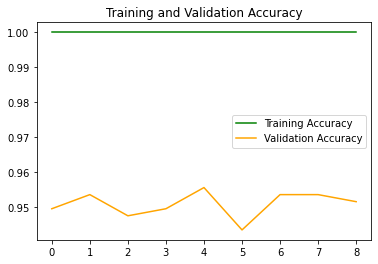

In [59]:
plt.plot(epochs, acc, 'green', label='Training Accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
 
plt.show()

In [61]:
pred = grid.predict(test_data)
predict =np.argmax(pred,axis=1)

In [62]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(predict , test_labels)

0.986

In [69]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

In [70]:
#f1_score
f1_score(predict, test_labels)

0.9857433808553973

In [71]:
# Recall Score
recall_score(predict, test_labels)

0.9958847736625515

In [72]:
# Precision Score
precision_score(predict,test_labels)

0.9758064516129032

In [73]:
confusion_matrix(predict,test_labels)

array([[251,   6],
       [  1, 242]], dtype=int64)